### Scipy : high-level scientific computing

In [1]:
import warnings
warnings.filterwarnings('ignore')

scipy is composed of task-specific sub-modules:

|Mold|do|
|--|--|
|scipy.cluster | Vector quantization / Kmeans|
|scipy.constants |Physical and mathematical constants| 
|scipy.fftpack |Fourier transform|
|scipy.integrate |Integration routines|
|scipy.interpolate |Interpolation|
|scipy.io | Data input and output|
|scipy.linalg | Linear algebra routines|
|scipy.ndimage | n-dimensional image package|
|scipy.odr | Orthogonal distance regression|
|scipy.optimize | Optimization|
|scipy.signal | Signal processing|
|scipy.sparse | Sparse matrices|
|scipy.spatial | Spatial data structures and algorithms|
|scipy.special | Any special mathematical functions|
|scipy.stats | Statistics |

In [2]:
import numpy as np
from scipy import stats # same for other sub-modules

### File input/output: `scipy.io`

In [3]:
from scipy import io as spio

a = np.ones((3, 3))

spio.savemat('data/file.mat', {'a': a}) # savemat expects a dictionary

data = spio.loadmat('data/file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
# Warning: Python / Matlab mismatches, eg matlab does not represent 1D arrays
a = np.ones(3)
print(a)

spio.savemat('data/file.mat', {'a': a})
spio.loadmat('data/file.mat')['a']

[1. 1. 1.]


array([[1., 1., 1.]])

In [ ]:
# import imageio
# imageio.imread('data/fname.png')

# Matplotlib also has a similar function
import matplotlib.pyplot as plt

plt.imread('data/fname.png')

### Linear algebra operations: `scipy.linalg`

In [6]:
# The scipy.linalg.det() function computes the determinant of a square matrix:
from scipy import linalg

arr = np.array([[1, 2],
                    [3, 4]])

linalg.det(arr)
arr = np.array([[3, 2],
                [6, 4]])

linalg.det(arr)
linalg.det(np.ones((3, 4)))

ValueError: expected square matrix

In [7]:
# The scipy.linalg.inv() function computes the inverse of a square matrix:
arr = np.array([[1, 2],
                [3, 4]])

iarr = linalg.inv(arr)
print(iarr)

np.allclose(np.dot(arr, iarr), np.eye(2))

[[-2.   1. ]
 [ 1.5 -0.5]]


True

In [8]:
# Finally computing the inverse of a singular matrix (its determinant is zero) will raise LinAlgError:
arr = np.array([[3, 2],
                [6, 4]])

linalg.inv(arr)

LinAlgError: singular matrix

In [9]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [10]:
spec

array([14.88982544,  0.45294236,  0.29654967])

In [11]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

### Interpolation: `scipy.interpolate`

In [12]:
# By imagining experimental data close to a sine function:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [13]:
# scipy.interpolate.interp1d can build a linear interpolation function:

from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

In [14]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [15]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

### Optimization and fit: `scipy.optimize`

In [16]:
from scipy import optimize

In [17]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

In [18]:
def test_func(x, a, b):
    return a * np.sin(b * x)

In [19]:
params, params_covariance = optimize.curve_fit(test_func, 
                                               x_data, 
                                               y_data, 
                                               p0=[2, 2])

print(params)

[2.86918509 1.4697811 ]


In [20]:
def f(x):
    return x**2 + 10*np.sin(x)

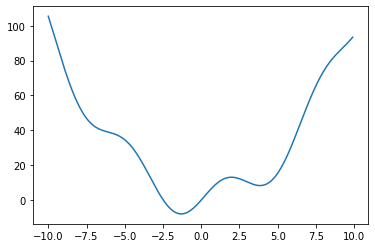

In [21]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

plt.show()

In [22]:
result = optimize.minimize(f, x0=0)
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [23]:
result.x

array([-1.30644012])

In [24]:
optimize.minimize(f, 
                  x0=0,
                  method="L-BFGS-B")

      fun: -7.94582337561514
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.68753901e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644017])

In [25]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")
res.x

array([3.83746709])

In [26]:
optimize.basinhopping(f, 0)

                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[0.08581667]])
      jac: array([-5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644002])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1014
                        nit: 100
                       njev: 507
                    success: True
                          x: array([-1.30644002])

In [27]:
res = optimize.minimize(f, 
                        x0=1,
                        bounds=((0, 10), ))

res.x

array([0.])

In [28]:
root = optimize.root(f, x0=1) # our initial guess is 1
root # The full result

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

In [29]:
root.x # Only the root found

array([0.])

In [30]:
root2 = optimize.root(f, x0=-2.5)
root2.x

array([-2.47948183])

### Statistics and random numbers: `scipy.stats`

#### Distributions: histogram and probability density function

[-4 -3 -2 -1  0  1  2  3  4]
[-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]


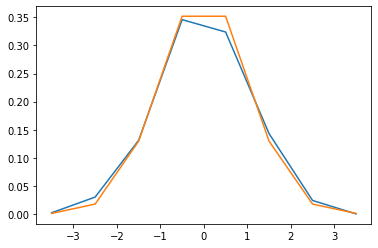

In [31]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
print(bins)

histogram = np.histogram(samples, 
                         bins=bins, 
                         density=True)[0]

bins = 0.5*(bins[1:] + bins[:-1])
print(bins)

from scipy import stats
pdf = stats.norm.pdf(bins) # norm is a distribution object
plt.plot(bins, histogram)
plt.plot(bins, pdf);

In [32]:
loc, std = stats.norm.fit(samples)
loc

-0.008706057895034133

In [33]:
std

1.0399407234393734

#### Mean, median and percentiles

In [34]:
np.mean(samples)

-0.008706057895034133

In [35]:
np.median(samples)

-0.019891912797471042

In [36]:
stats.scoreatpercentile(samples, 50)

-0.019891912797471042

In [37]:
stats.scoreatpercentile(samples, 90)

1.3800683496235473

#### Statistical tests

In [38]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)

stats.ttest_ind(a, b)

Ttest_indResult(statistic=-1.9411691169904186, pvalue=0.05484364525331852)

### Numerical integration: `scipy.integrate`

#### Function integrals

In [39]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)

np.allclose(res, 1) # res is the result, is should be close to 1
np.allclose(err, 1 - res) # err is an estimate of the err

True

#### Integrating differential equations

In [40]:
def calc_derivative(ypos, time):
    return -2 * ypos

In [41]:
from scipy.integrate import odeint

time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_vec)

In [42]:
mass = 0.5 # kg
kspring = 4 # N/m
cviscous = 0.4 # N s/m

In [43]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

In [44]:
eps < 1

True

In [45]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], 
            -2.0 * eps * omega * yvec[1] - omega **2 * yvec[0])

In [46]:
time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)

yarr = odeint(calc_deri, 
              yinit, 
              time_vec, 
              args=(eps, omega))

### Fast Fourier transforms: `scipy.fftpack`

In [ ]:
from scipy import fftpack

sig_fft = fftpack.fft(sig)
freqs = fftpack.fftfreq(sig.size, d=time_step)

### Signal processing: `scipy.signal`

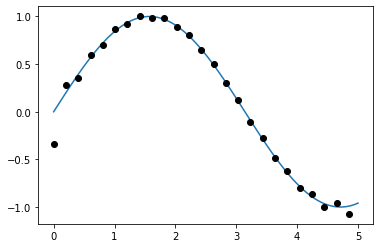

In [48]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

from scipy import signal
x_resampled = signal.resample(x, 25)
plt.plot(t, x)
plt.plot(t[::4], x_resampled, 'ko');

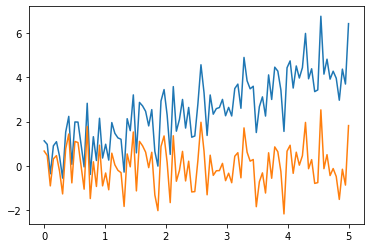

In [49]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

from scipy import signal

x_detrended = signal.detrend(x)
plt.plot(t, x)
plt.plot(t, x_detrended);

### Image manipulation: `scipy.ndimage`

#### Geometrical transformations on images

(-0.5, 1023.5, 767.5, -0.5)

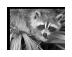

In [50]:
from scipy import misc # Load an image
face = misc.face(gray=True)

from scipy import ndimage # Shift, roate and zoom it
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

#### Image filtering

In [51]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # crop out square on right

import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

In [52]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5, 5))

#### Mathematical morphology

In [53]:
el = ndimage.generate_binary_structure(2, 1)
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [54]:
# Erosion scipy.ndimage.binary_erosion()
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [55]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [56]:
#Erosion removes objects smaller than the structure
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [57]:
# Dilation scipy.ndimage.binary_dilation()
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [58]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [59]:
# Opening scipy.ndimage.binary_opening()
a = np.zeros((5, 5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
print(a)

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 1]]


In [60]:
# Opening removes small objects
ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [61]:
# Opening can also smooth corners
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [62]:
# Closing: scipy.ndimage.binary_closing()

In [63]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)

mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

In [64]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 1:6] = 3
a[4, 4] = 2; a[2, 3] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 1, 3, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 3, 2, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [65]:
ndimage.grey_erosion(a, size=(3, 3))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

#### Connected components and measurements on images

In [66]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1
labels, nb = ndimage.label(mask)
nb

8

In [67]:
# Now compute measurements on each connected component:
areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
areas # The number of pixels in each connected component
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima # The maximum signal in each connected component

array([ 1.80238238,  1.13527605,  5.51954079,  2.49611818,  6.71673619,
        1.80238238, 16.76547217,  5.51954079])

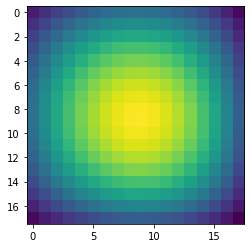

In [68]:
ndimage.find_objects(labels==4)
sl = ndimage.find_objects(labels==4)

from matplotlib import pyplot as plt
plt.imshow(sig[sl[0]]);

### Full code examples for the scipy chapter

#### Finding the minimum of a smooth function

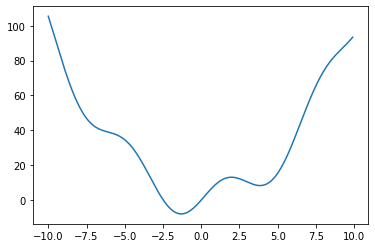

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [70]:
from scipy import optimize

# The default (Nelder Mead)
print(optimize.minimize(f, x0=0))

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


In [71]:
print(optimize.minimize(f, x0=0, method="L-BFGS-B"))

      fun: -7.94582337561514
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.68753901e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644017])


In [72]:
plt.show()

#### Detrending a signal

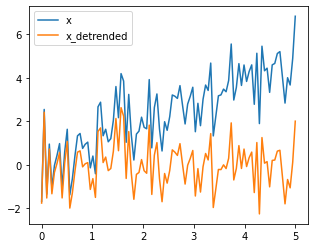

In [73]:
# Generate a random signal with a trend

import numpy as np

t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

# Detrend
from scipy import signal

x_detrended = signal.detrend(x)

# Plot
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 4))
plt.plot(t, x, label="x")
plt.plot(t, x_detrended, label="x_detrended")
plt.legend(loc='best')
plt.show()

#### Resample a signal with `scipy.signal.resample`

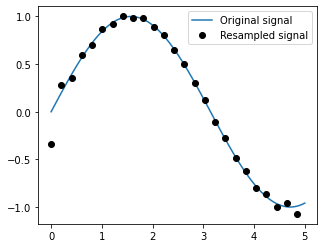

In [74]:
# Generate a signal with 100 data point
import numpy as np
t = np.linspace(0, 5, 100)
x = np.sin(t)

# Downsample it by a factor of 4
from scipy import signal
x_resampled = signal.resample(x, 25)

# Plot
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 4))
plt.plot(t, x, label='Original signal')
plt.plot(t[::4], x_resampled, 'ko', label='Resampled signal')
plt.legend(loc='best')
plt.show()

#### Integrating a simple ODE

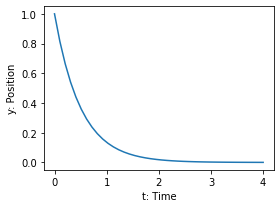

In [75]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

def calc_derivative(ypos, time):
    return -2*ypos

time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

plt.figure(figsize=(4, 3))
plt.plot(time_vec, yvec)

plt.xlabel('t: Time')
plt.ylabel('y: Position')

plt.tight_layout()

#### Comparing 2 sets of samples from Gaussians

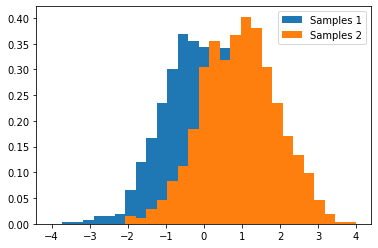

In [76]:
import numpy as np
from matplotlib import pyplot as plt

# Generates 2 sets of observations
samples1 = np.random.normal(0, size=1000)
samples2 = np.random.normal(1, size=1000)

# Compute a histogram of the sample
bins = np.linspace(-4, 4, 30)
histogram1, bins = np.histogram(samples1, bins=bins, density=True)
histogram2, bins = np.histogram(samples2, bins=bins, density=True)

plt.figure(figsize=(6, 4))
plt.hist(samples1, bins=bins, density=True, label="Samples 1")
plt.hist(samples2, bins=bins, density=True, label="Samples 2")
plt.legend(loc='best')
plt.show()

#### Integrate the Damped spring-mass oscillator

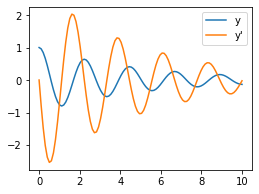

In [77]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

mass = 0.5 # kg
kspring = 4 # N/m
cviscous = 0.4 # N s/m
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

plt.figure(figsize=(4, 3))

plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")

plt.legend(loc='best')

plt.show()

#### Normal distribution: histogram and PDF

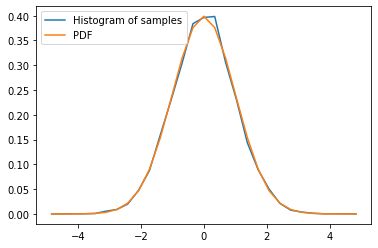

In [78]:
import numpy as np

# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats

pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

#### Curve fitting

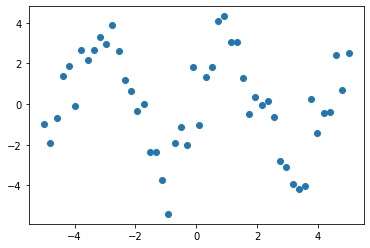

In [79]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [80]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, 
                                               x_data, 
                                               y_data,
                                               p0=[2, 2])

print(params)

[3.05931973 1.45754553]


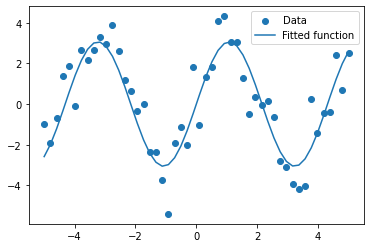

In [81]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, 
         test_func(x_data, 
                           params[0], 
                           params[1]),
         label='Fitted function')
plt.legend(loc='best')
plt.show()

#### Spectrogram, power spectral density

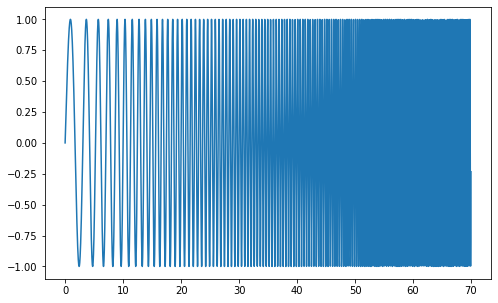

In [82]:
# Generate a chirp signal
# Seed the random number generator

np.random.seed(0)
time_step = .01
time_vec = np.arange(0, 70, time_step)

# A signal with a small frequency chirp
sig = np.sin(0.5 * np.pi * time_vec * (1 + .1 * time_vec))
plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

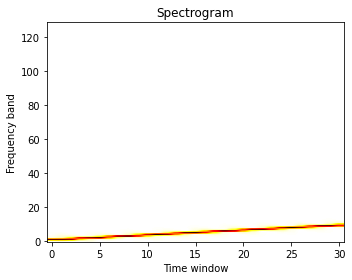

In [83]:
# Compute and plot the spectrogram
from scipy import signal

freqs, times, spectrogram = signal.spectrogram(sig)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, 
           aspect='auto', 
           cmap='hot_r', 
           origin='lower')

plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

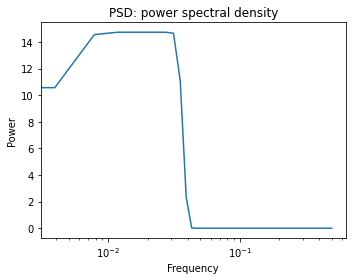

In [84]:
# Compute and plot the power spectral density (PSD)
freqs, psd = signal.welch(sig)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

#### A demo of 1D interpolation

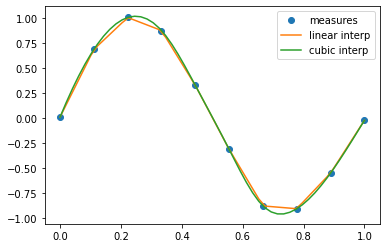

In [85]:
# Generate data
import numpy as np

np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points

from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

#### Demo mathematical morphology

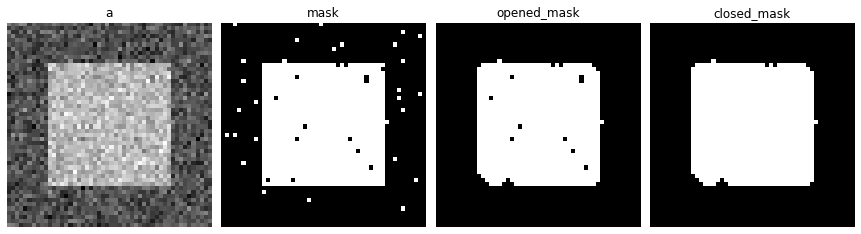

In [86]:
# Generate some binary data
import numpy as np

np.random.seed(0)
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a>=0.5

# Apply mathematical morphology
from scipy import ndimage
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

# Plot
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 3.5))

plt.subplot(141)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')
plt.title('a')

plt.subplot(142)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')

plt.subplot(143)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opened_mask')

plt.subplot(144)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.title('closed_mask')
plt.axis('off')

plt.subplots_adjust(wspace=.05, 
                    left=.01, 
                    bottom=.01, 
                    right=.99, 
                    top=.99)

plt.show()

#### Plot geometrical transformations on images

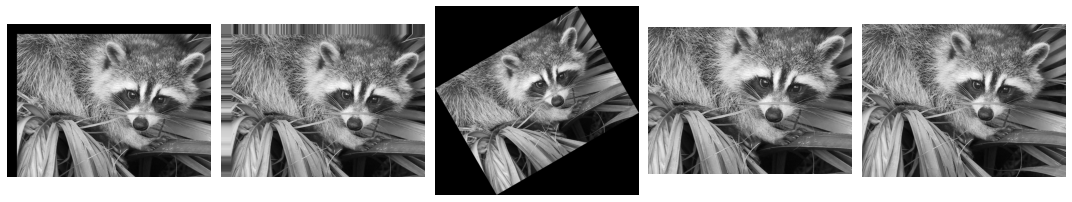

In [87]:
# Load some data
from scipy import misc
face = misc.face(gray=True)

# Apply a variety of transformations
from scipy import ndimage
from matplotlib import pyplot as plt

shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

plt.figure(figsize=(15, 3))

plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, 
                    left=.01, 
                    bottom=.01, 
                    right=.99, 
                    top=.99)

plt.show()

#### Demo connected components

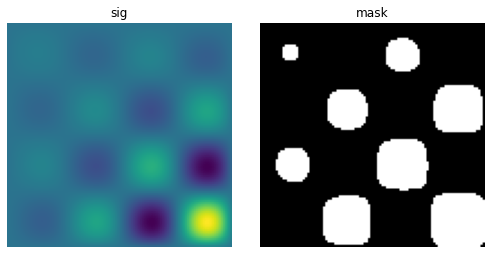

In [88]:
import numpy as np
from matplotlib import pyplot as plt

# Generate some binary data

np.random.seed(0)

x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1

plt.figure(figsize=(7, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis('off')
plt.title('sig')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')

plt.subplots_adjust(wspace=.05, 
                    left=.01, 
                    bottom=.01, 
                    right=.99, 
                    top=.9)

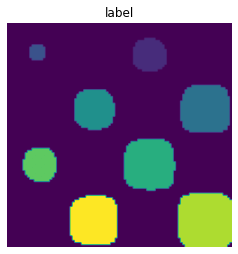

In [89]:
# Label connected components
from scipy import ndimage

labels, nb = ndimage.label(mask)

plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title('label')
plt.axis('off')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

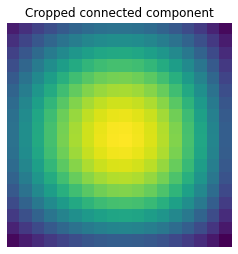

In [90]:
# Extract the 4th connected component, and crop the array around it
sl = ndimage.find_objects(labels==4)

plt.figure(figsize=(3.5, 3.5))
plt.imshow(sig[sl[0]])
plt.title('Cropped connected component')
plt.axis('off')
plt.subplots_adjust(wspace=.05, 
                    left=.01, 
                    bottom=.01, 
                    right=.99, 
                    top=.9)

plt.show()

#### Minima and roots of a function

In [91]:
# Define the function

import numpy as np
x = np.arange(-10, 10, 0.1)

def f(x):
    return x**2 + 10*np.sin(x)

In [92]:
# Find minima
from scipy import optimize

# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s " % xmin_global)

# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10)
print("Local minimum found %s " % xmin_local)

Global minima found [-1.30641113] 
Local minimum found 3.8374671194983834 


In [93]:
# Root finding

root = optimize.root(f, 1) # our initial guess is 1
print("First root found %s " % root.x)

root2 = optimize.root(f, -2.5)
print("Second root found %s " % root2.x)

First root found [0.] 
Second root found [-2.47948183] 


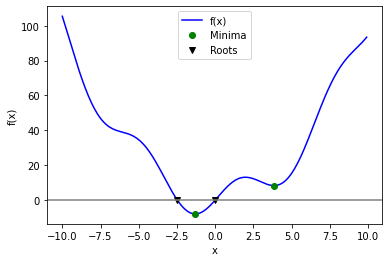

In [94]:
# Plot function, minima, and roots
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')

plt.show()

#### Plot filtering on images

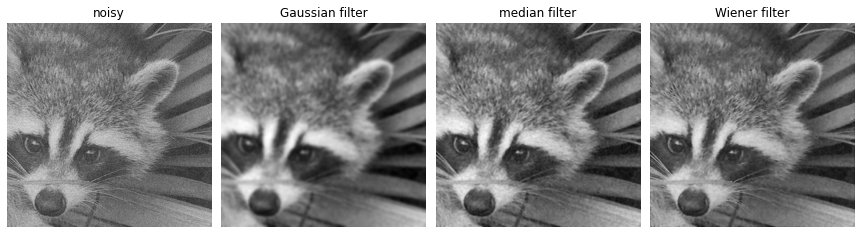

In [95]:
# Load some data
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # crop out square on right

# Apply a variety of filters
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np

noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))

plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplots_adjust(wspace=.05, 
                    left=.01, 
                    bottom=.01, 
                    right=.99, 
                    top=.99)

plt.show()

#### Optimization of a two-parameter function

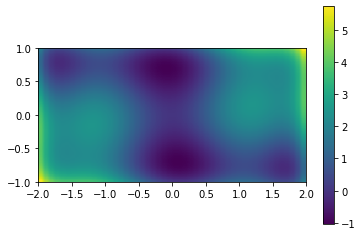

In [96]:
import numpy as np
# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

# A 2D image plot of the function
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

Text(0.5, 0.92, 'Six-hump Camelback function')

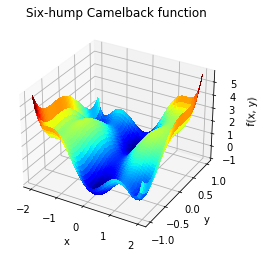

In [97]:
# A 3D surface plot of the function
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

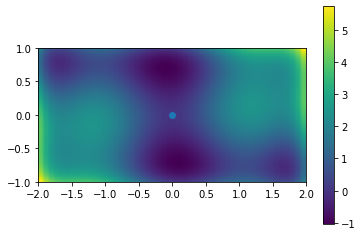

In [98]:
# Find the minima

from scipy import optimize
x_min = optimize.minimize(sixhump, x0=[0, 0])
plt.figure()

# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])
plt.show()

#### Plotting and manipulating FFTs for filtering

In [99]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

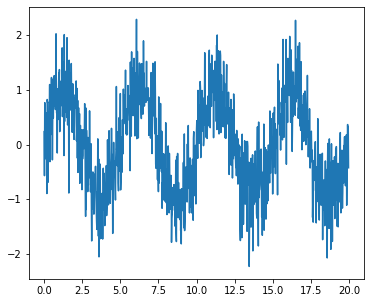

In [100]:
# Generate the signal
# Seed the random number generator
np.random.seed(1234)
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

[]

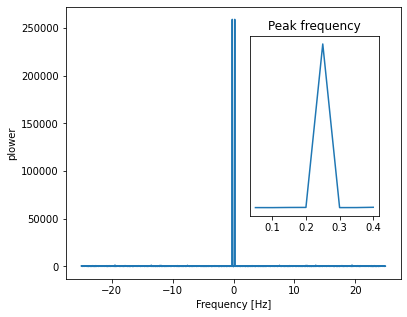

In [101]:
# Compute and plot the power
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])

plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

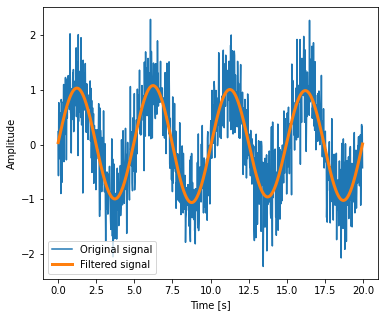

In [102]:
# Remove all the high frequencies

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

In [ ]:
from scipy import fftpack

ft_populations = fftpack.fft(populations, axis=0)
frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')
plt.show()

Text(0, 0.5, 'Min and max temperature')

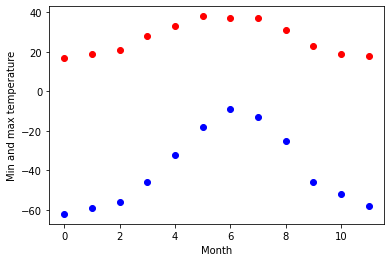

In [104]:
import matplotlib.pyplot as plt
import numpy as np

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])


months = np.arange(12)

plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [105]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
temp_min, [-40, 20, 0])

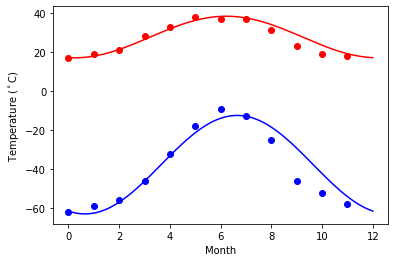

In [106]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

In [107]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

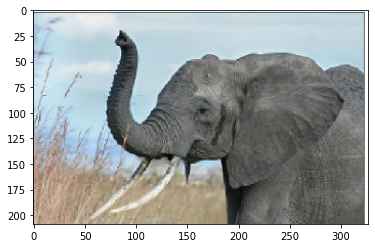

In [108]:
# read image
img = plt.imread('data/elephant.png')

plt.figure()
plt.imshow(img)

In [109]:
# First a 1-D Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

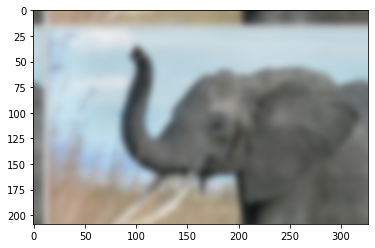

In [110]:
# Padded fourier transform, with the same shape as the image
# We use :func:`scipy.signal.fftpack.fft2` to have a 2D FFT
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))

# the 'newaxis' is to match to color direction
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.figure()
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


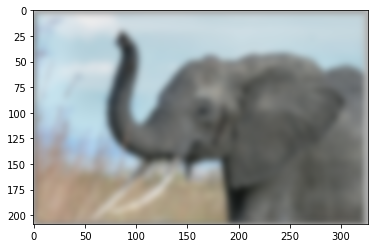

In [111]:
from scipy import signal

# mode='same' is there to enforce the same output shape as input arrays
# (ie avoid border effects)
img3 = signal.fftconvolve(img, kernel[:, :, np.newaxis], mode='same')
plt.figure()
plt.imshow(img3)

In [112]:
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('data/moonlanding.png').astype(float)
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [ ]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm

    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), 
               norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

In [ ]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

In [ ]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [ ]:
from scipy import ndimage

im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')
plt.show()

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.